In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mlp
mlp.style.use('ggplot')

In [2]:
df=pd.read_csv('Iris (1).csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
print('number of columns in dataset is ',df.shape[1])
print('number of rows in dataset is ',df.shape[0])

number of columns in dataset is  6
number of rows in dataset is  150


* we will drop id column which is not useful for the modeling

In [5]:
df=df.drop('Id',axis=1)

In [6]:
print('number of columns in dataset is ',df.shape[1])
print('number of rows in dataset is ',df.shape[0])

number of columns in dataset is  5
number of rows in dataset is  150


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

from the dataset we can sayy that no null values present in this dataset


In [9]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


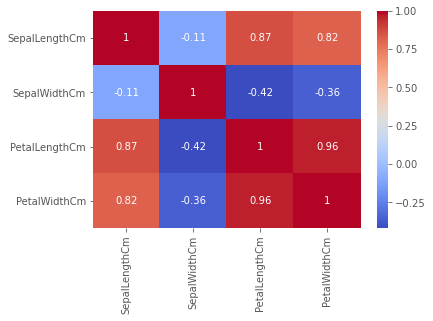

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [11]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

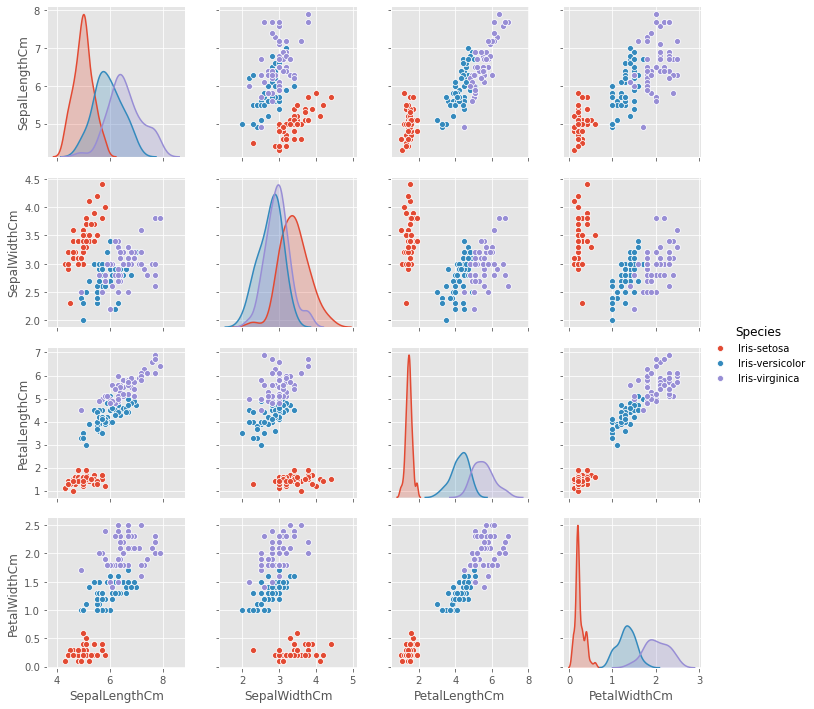

In [12]:
sns.pairplot(df,hue='Species')
plt.show()

#### we will do clusterong 

In [13]:
X=df.drop('Species',axis=1)
y=df['Species']

##### KMEANS CLUSTERIG

In [14]:
from sklearn.preprocessing import scale as scale
scaled_kdf = scale(X)
scaled_kdf

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [15]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(scaled_kdf)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,600.000000
1,2,223.732006
2,3,140.965817
3,4,114.644614
4,5,91.066771
5,6,81.692252
6,7,72.591475
7,8,62.619695
8,9,54.679572


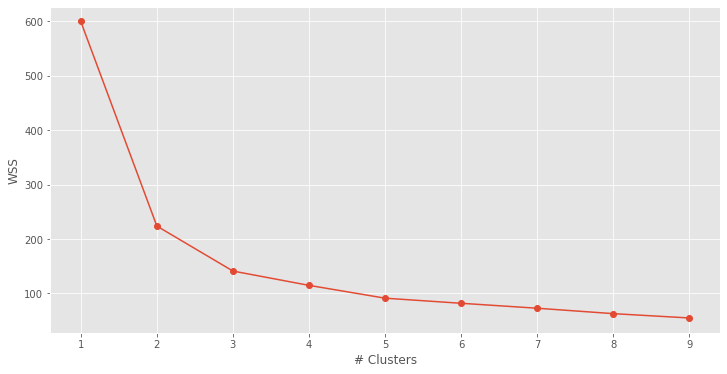

In [16]:
plt.figure(figsize=(12,6))
plt.xlabel('# Clusters')
plt.ylabel('WSS')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

##### from the above ELBOW PLOT we can clearly see 3 NUMBERS  CLUSTERS

In [17]:
kcluster=KMeans(n_clusters=3,random_state=10)

In [18]:
kcluster.fit(scaled_kdf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [19]:
df['clusters']=kcluster.fit_predict(scaled_kdf)

In [20]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(scaled_kdf)

## Getting a Visual Plot
## Defining Colours and Labels for the Plot
def color_fun (row):
    if(row['clusters']==0):
        return 'red'
    if(row['clusters']==1):
        return 'green'
    if(row['clusters']==2):
        return 'blue'
    if(row['clusters']==3):
        return 'orange'
    return 0

In [21]:
df['color']=df.apply(lambda row : color_fun(row),axis=1)

plot_labels=df.iloc[:,[1]].values.ravel()

In [22]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters,color
0,5.1,3.5,1.4,0.2,Iris-setosa,1,green
1,4.9,3.0,1.4,0.2,Iris-setosa,1,green
2,4.7,3.2,1.3,0.2,Iris-setosa,1,green
3,4.6,3.1,1.5,0.2,Iris-setosa,1,green
4,5.0,3.6,1.4,0.2,Iris-setosa,1,green


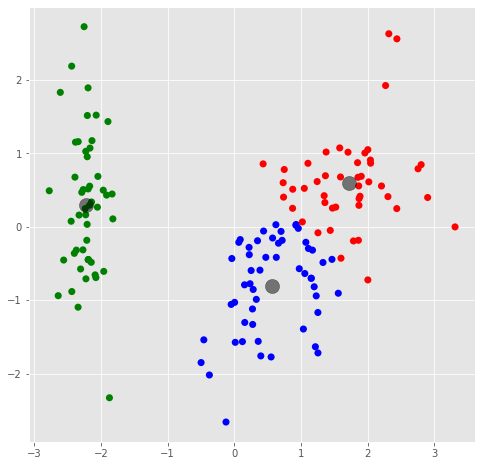

In [23]:
model=KMeans(n_clusters=3,random_state=2)
model.fit(plot_columns)

plt.figure(figsize=(8,8))

x=plt.scatter(x=plot_columns[:,0],
           y=plot_columns[:,1],c=df['color'].values,s=50,edgecolors='None')

##finding the centroids of each cluster

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [24]:
#### cluster profiling
clus=df.groupby('clusters').mean()
clus

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clusters,,,,
0,6.780851,3.095745,5.510638,1.972340
1,5.006000,3.418000,1.464000,0.244000
2,5.801887,2.673585,4.369811,1.413208


In [25]:
df['clusters'].value_counts()

2    53
1    50
0    47
Name: clusters, dtype: int64

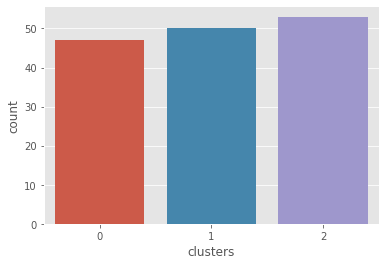

In [26]:
sns.countplot(df['clusters'])
plt.show()

In [27]:
y.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### Hieracial clustering

In [29]:
from scipy.spatial.distance import pdist, squareform
# pdist ## Shift + TAB or Ctrl + i 
d_euc = pdist(X, metric = "euclidean")

In [30]:
pd.DataFrame(squareform(d_euc.round(2))).head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.00,0.54,0.51,0.65,0.14,0.62,0.52,0.17,0.92,0.47,...,5.02,4.64,4.21,5.26,5.14,4.65,4.28,4.46,4.65,4.14
1,0.54,0.00,0.30,0.33,0.61,1.09,0.51,0.42,0.51,0.17,...,5.07,4.70,4.18,5.32,5.21,4.70,4.25,4.50,4.72,4.15
2,0.51,0.30,0.00,0.24,0.51,1.09,0.26,0.41,0.44,0.32,...,5.23,4.87,4.33,5.48,5.35,4.86,4.43,4.66,4.85,4.30
3,0.65,0.33,0.24,0.00,0.65,1.17,0.33,0.50,0.30,0.32,...,5.10,4.76,4.18,5.35,5.23,4.75,4.29,4.53,4.72,4.15
4,0.14,0.61,0.51,0.65,0.00,0.62,0.46,0.22,0.92,0.53,...,5.06,4.69,4.25,5.30,5.17,4.70,4.33,4.50,4.68,4.17


In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree 


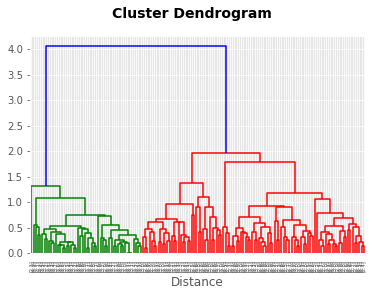

In [33]:
clus1 = linkage(d_euc, method = 'average')

import matplotlib.pyplot as plt
%matplotlib inline
dendrogram (clus1,labels=df.iloc[:,[1]].values.tolist())
plt.xlabel('hclust')
plt.xlabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight = 'bold',fontsize = 14);

In [34]:
d_euc = pdist(scaled_kdf, metric = 'euclidean')
clus2 = linkage(d_euc, method = 'ward')

Text(0.5, 0.98, 'Cluster Dendrogram')

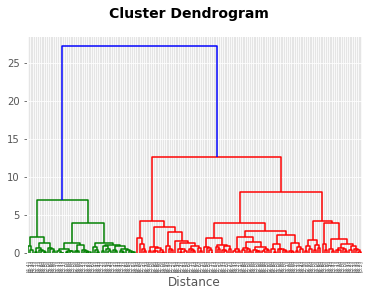

In [35]:
dendrogram (clus2,labels=df.iloc[:,[1]].values.tolist())
plt.xlabel('hclust')
plt.xlabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight = 'bold',fontsize = 14)

##### from dendrogram also we got 3 cluster 